<a href="https://colab.research.google.com/github/gwangjinjeong/Study_DeepLearning/blob/main/CNN/02_Horse_or_Human_classifier_with_ImageGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise Using a **Image Generator**
 Laurence Moroney가 무료로 배포한 [Horse or Humans](https://laurencemoroney.com/datasets.html) 데이터셋으로 CNN과<br>
모델빌딩을 쉽게 해주는 ImageGenerator 사용법을 실습해보도록 하자.

## 1\. 데이터 소스 다운로드<br>

In [ ]:
!mkdir -p dataset/train
!mkdir -p dataset/test

In [ ]:
!wget  https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip
!wget  https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip

In [ ]:
!unzip ./horse-or-human.zip -d dataset/train
!unzip ./validation-horse-or-human.zip -d dataset/test

### 만약 파이썬 환경일 경우

In [ ]:
import os
import urllib.request as urllib
import zipfile

os.makedirs('./dataset_horses')
url_train = "https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"
url_test = "https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip"

urllib.urlretrieve(url_train, 'horse-or-human.zip')
local_zip = 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('dataset_horses/horse-or-human/')
zip_ref.close()

urllib.urlretrieve(url_test, 'validation-horse-or-human.zip')
local_zip = 'validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('dataset_horses/validation-horse-or-human/')
zip_ref.close()

## 2\. 환경변수 설정

In [ ]:
import os

# Directory with training horse pictures
train_horse_dir = os.path.join('./dataset_horses/horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('./dataset_horses/horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./dataset_horses/validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./dataset_horses/validation-horse-or-human/humans')

## 3\. EDA 

### (1) 이미지 파일 형식 확인

In [ ]:
print(os.listdir(train_horse_dir)[:5])
print(os.listdir(train_human_dir)[:5])
print(os.listdir(validation_horse_dir)[:5])
print(os.listdir(validation_human_dir)[:5])

['horse09-6.png', 'horse10-5.png', 'horse49-9.png', 'horse17-3.png', 'horse48-2.png']
['human04-14.png', 'human14-15.png', 'human06-28.png', 'human03-30.png', 'human09-25.png']
['horse1-127.png', 'horse3-440.png', 'horse1-411.png', 'horse4-599.png', 'horse4-014.png']
['valhuman01-11.png', 'valhuman02-22.png', 'valhuman02-01.png', 'valhuman03-18.png', 'valhuman05-23.png']


### (2) 파일 갯수 확인

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)
validation_horse_names = os.listdir(validation_horse_dir)
validation_human_names = os.listdir(validation_human_dir)
print('\tTrain data')
print(f'말 이미지 총 갯수: {len(train_horse_names)}')
print(f'말 이미지 총 갯수(중복없이): {len(set(train_horse_names))}')
print(f'사람 이미지 총 갯수: {len(train_human_names)}')
print(f'사람 이미지 총 갯수(중복없이): {len(set(train_human_names))}')
print()
print('\tTest data')
print(f'말 이미지 총 갯수: {len(validation_horse_names)}')
print(f'말 이미지 총 갯수(중복없이): {len(set(validation_horse_names))}')
print(f'사람 이미지 총 갯수: {len(validation_human_names)}')
print(f'사람 이미지 총 갯수(중복없이): {len(set(validation_human_names))}')

	Train data
말 이미지 총 갯수: 500
말 이미지 총 갯수(중복없이): 500
사람 이미지 총 갯수: 527
사람 이미지 총 갯수(중복없이): 527

	Test data
말 이미지 총 갯수: 128
말 이미지 총 갯수(중복없이): 128
사람 이미지 총 갯수: 128
사람 이미지 총 갯수(중복없이): 128


### (3) 이미지 형태 확인

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

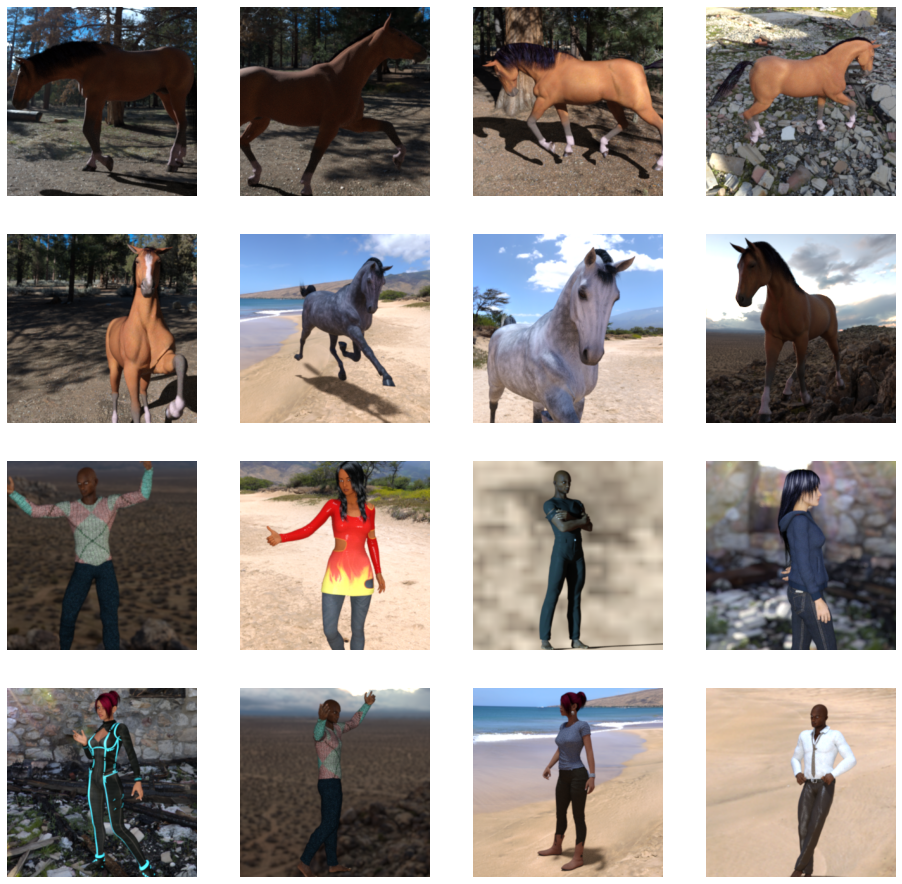

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### (4) 데이터 전처리

In [ ]:
print(mpimg.imread(os.path.join(train_horse_dir,train_horse_names[0])).shape)

(300, 300, 4)


##### - Normalization

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalization => All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)


In [ ]:
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './dataset_horses/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './dataset_horses/validation-horse-or-human/',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## 3\. 모델링

### (1) Input shape 다시 확인

In [ ]:
print(mpimg.imread(os.path.join(train_horse_dir,train_horse_names[0])).shape)

(300, 300, 4)


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

## 4\. 모델 훈련

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 90s 10s/step - loss: 0.7842 - accuracy: 0.5273 - val_loss: 0.6703 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 82s 10s/step - loss: 0.6152 - accuracy: 0.6585 - val_loss: 0.4903 - val_accuracy: 0.8203
Epoch 3/15
8/8 [==============================] - 81s 10s/step - loss: 0.5182 - accuracy: 0.8654 - val_loss: 0.4571 - val_accuracy: 0.8047
Epoch 4/15
8/8 [==============================] - 81s 10s/step - loss: 0.9485 - accuracy: 0.7586 - val_loss: 0.9249 - val_accuracy: 0.6445
Epoch 5/15
8/8 [==============================] - 82s 10s/step - loss: 0.3930 - accuracy: 0.8432 - val_loss: 2.2208 - val_accuracy: 0.6523
Epoch 6/15
8/8 [==============================] - 92s 12s/step - loss: 0.2320 - accuracy: 0.9160 - val_loss: 0.8430 - val_accuracy: 0.8398
Epoch 7/15
8/8 [==============================] - 83s 10s/step - loss: 0.4269 - accuracy: 0.8554 - val_loss: 1.3093 - val_accuracy: 0.7539
Epoch 8/15
8/8 [===========

## 5\. 추론(Inference)

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving hi.jpeg to hi.jpeg
[0.01038998]
hi.jpeg is a horse


### 6\. 시각화(Visualization)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


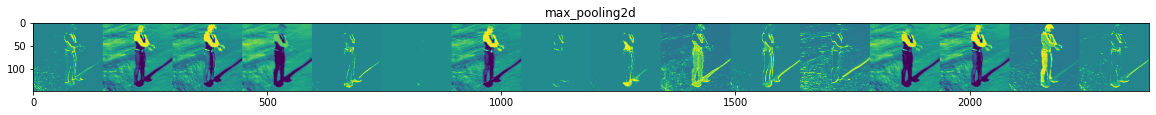

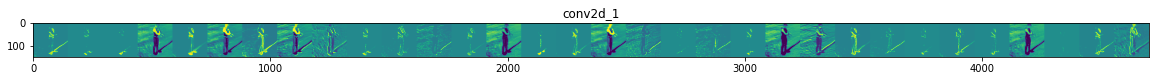

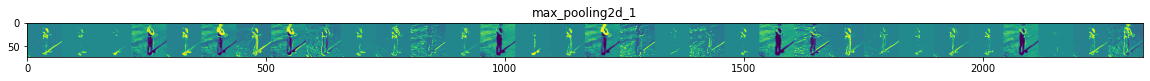

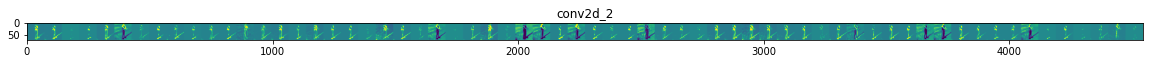

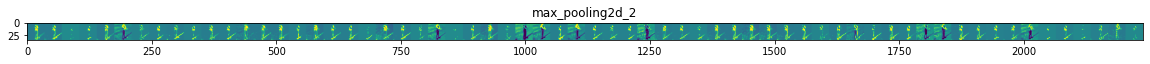

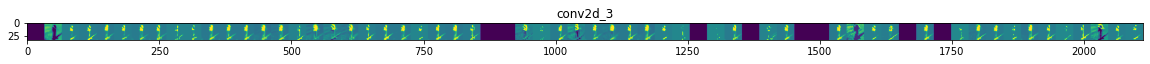

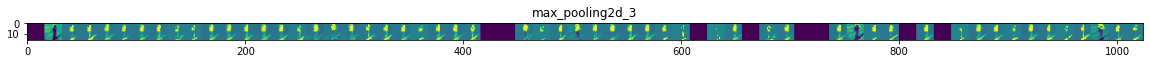

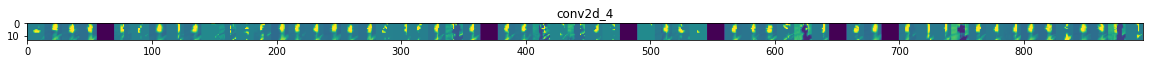

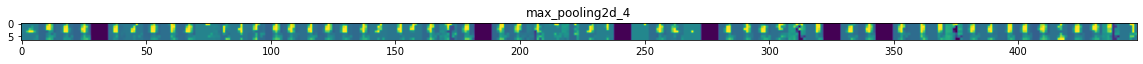

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')